In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(1, "..")
from packages.multivare import MN_distribution
from packages.basicDistributionFunctions import tau
from packages.mySweetCache import cache

In [2]:
Image_width = 10

In [3]:
MC = 10 ** 4

mu = [1, 0]
Sigma = [[1,0.5], [0.5, 1]]

MN = MN_distribution(MC, mu, Sigma)
print(len(MN[:,1]))
print(tau(MN[:,0], MN[:,1]))


10000
[0.4943096451976597, -0.0008351897129445854]


## Task 4


In [4]:
def use_k(MC, mu, Sigma, k):
    MN = MN_distribution(MC, mu, Sigma)
    if k == 0:
        return np.array([tau(MN[:,0], MN[:,1])])
    if k == 1:
        return np.array([tau(MN[:,1], MN[:,0])])

@cache("get_res")
def get_res(N, MC, mu, Sigma):
    res = []
    for i in range(N):
        res.append(use_k(MC, mu, Sigma, 0) - use_k(MC, mu, Sigma, 1))

    res = np.array(res)
    res = np.array([[line[0][0], line[0][1]] for line in res])
    return res

In [5]:
N = 10**3
res = get_res(N, MC, mu, Sigma)


<Figure size 432x288 with 0 Axes>

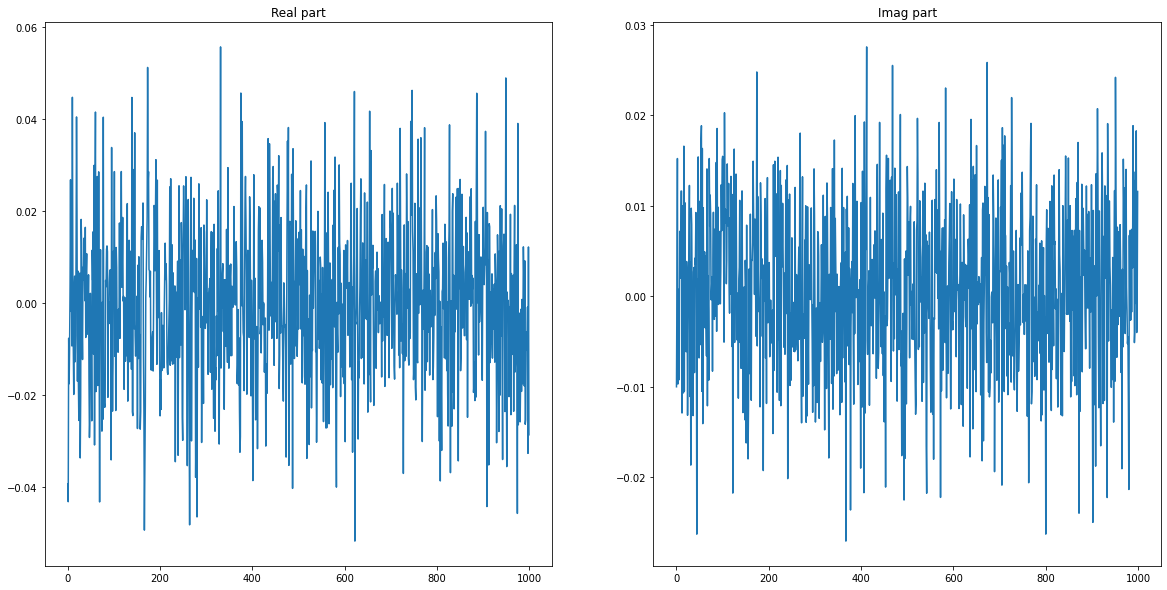

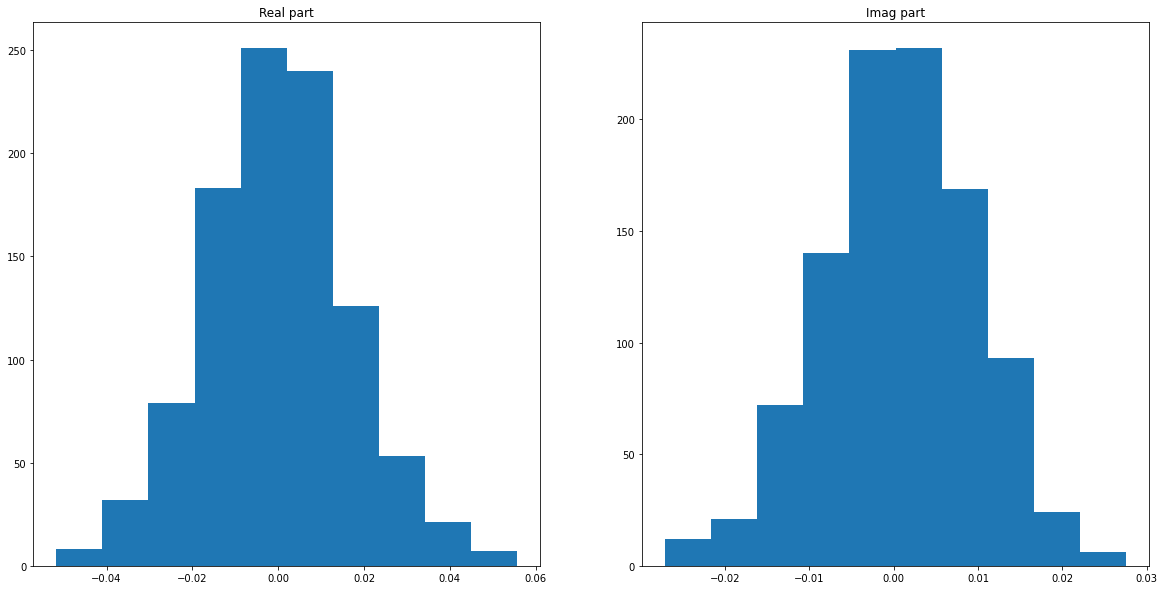

In [6]:
plt.figure(1)
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
ax.plot(res[:,0]);
ax.set_title("Real part");

ax = axs[1]
ax.plot(res[:,1]);
ax.set_title("Imag part");

plt.figure(2)
fig, axs = plt.subplots(ncols = 2, figsize = (2 * Image_width, Image_width))

ax = axs[0]
ax.hist(res[:,0]);
ax.set_title("Real part");

ax = axs[1]
ax.hist(res[:,1]);
ax.set_title("Imag part");



plt.show()